# Exploratory Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import f_oneway
from scipy.stats import pearsonr
from explore import explore_bedrooms, square_footage_vs_logerror, explore_bathrooms, heating_cooling_vs_logerror, yearbuilt_vs_logerror
from wrangle import acquire_zillow, split_data, handle_missing_values

# To ignore FutureWarning specifically:
warnings.filterwarnings("ignore", category=FutureWarning)

### Acquire and Prep

In [2]:
# Acquire the Zillow dataset and store it in the DataFrame 'df'
df = acquire_zillow()

In [3]:
# Call the 'handle_missing_values' function to handle missing values in the DataFrame 'df'
# It retains columns with at least 50% non-null values and rows with at least 50% non-null values.
df = handle_missing_values(df, prop_required_column=0.60, prop_required_row=0.60)

In [4]:
# Split the DataFrame 'df' into training (train), validation (val), and test (test) sets.
# 'target' parameter is set to None, indicating that there is no specific target column for splitting.
# The default split ratio is 70% training, 20% validation, and 10% test.
train, val, test = split_data(df, target=None)

1) Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g.  
Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

# a) Does the number of bedrooms have a correlation with logerror?

Null hypothesis: The number of bedrooms has no correlation with logerror
Alternative hypothesis: The number of bedrooms has a correlation with logerror
BAR PLOT


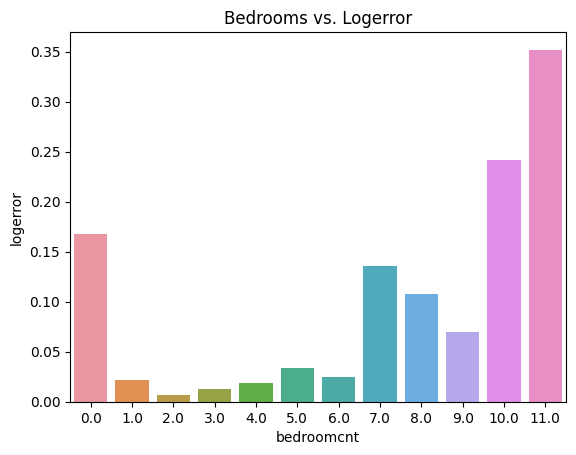

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.04052816117556195 and a p_value of 3.9374985828093286e-13


In [5]:
# This function explores the 'bedrooms' column of the DataFrame 'df'
explore_bedrooms(df)

The results of the statistical test provide evidence that there is a statistically significant, albeit relatively weak, positive correlation between the number of bedrooms and the logerror variable.

# b) Is there a relationship between the property's calculated square footage and logerror?

Null hypothesis: There is no relationship between the porpertys calculated square footage and logerror
Alternative hypothesis: There is a relationship between the porpertys calculated square footage and logerror
SCATTER PLOT


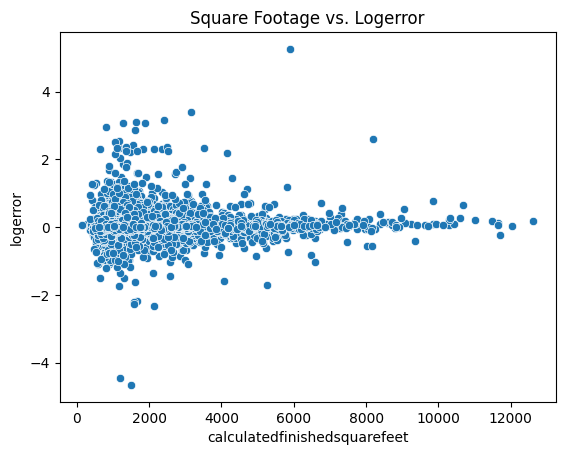

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.03887142097884526 and a p_value of 3.3839915147744495e-12


In [6]:
# Analyze the relationship between square footage and logerror
# and generate visualizations and statistics for the provided DataFrame 'df'.
square_footage_vs_logerror(df)

The results of the Pearson correlation test provide evidence that there is a statistically significant, albeit relatively weak, positive correlation between the property's calculated square footage and the logerror variable.

# C) Does the number of bathrooms have a correlation with logerror?

Null hypothesis: The number of bathrooms has no correlation with logerror
Alternative hypothesis: The number of bathrooms has a correlation with logerror
BAR PLOT


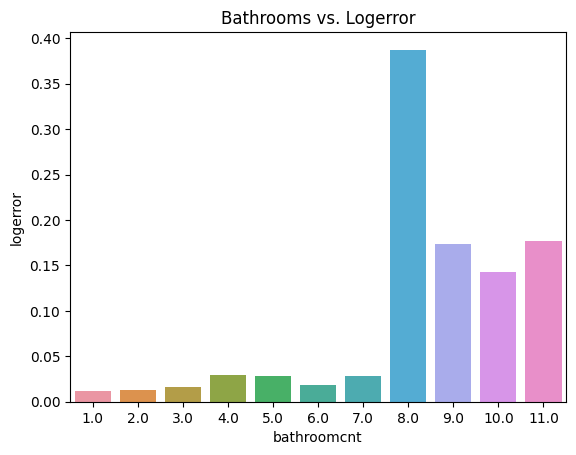

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.036684151191966 and a p_value of 5.071295652101681e-11


In [7]:
# Explore the relationship between the number of bathrooms and logerror in the provided DataFrame 'df'.
explore_bathrooms(df)

The results of your Pearson correlation test provide evidence that there is a statistically significant, albeit relatively weak, positive correlation between the number of bathrooms and the logerror variable. 

# d) Do properties with specific heating or cooling systems exhibit different logerror patterns?

Null hypothesis: Properties with specific heating or cooling systems do not exhibit different logerror patterns
Alternative hypothesis: Properties with specific heating or cooling systems exhibit different logerror patterns
BAR PLOT


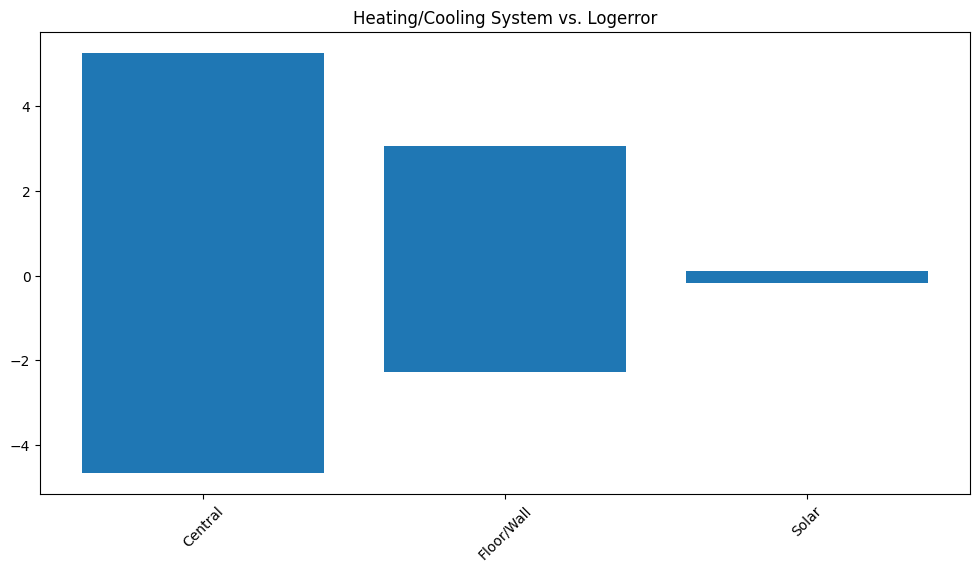

BOX PLOT


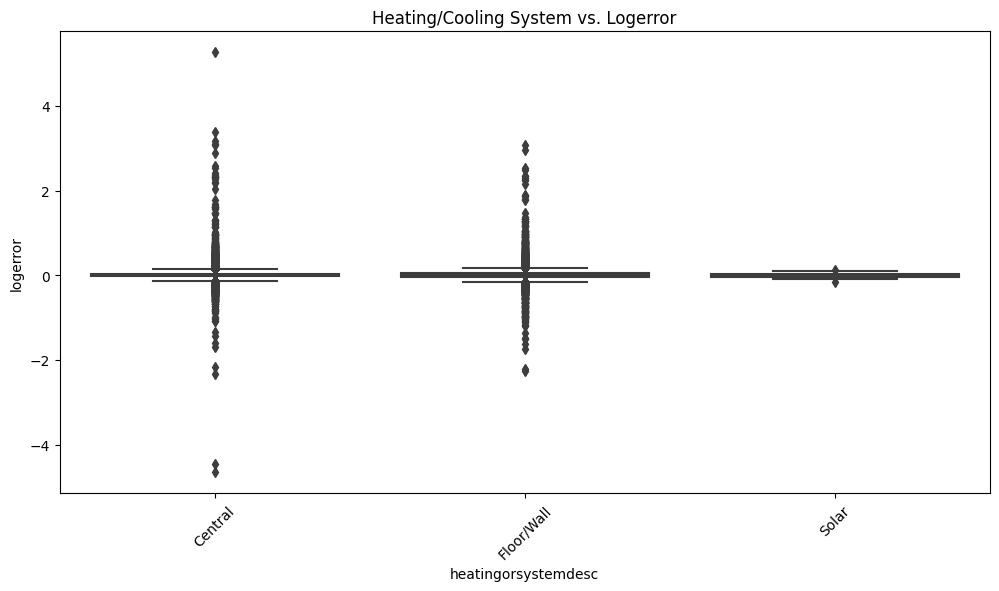

F-ONEWAY TEST
We do not reject the null hypothesis with an f_statistic of 0.39129463984036716 and a p_value of 0.6761841279126075


In [8]:
# Analyze the relationship between heating and cooling systems and logerror in the provided DataFrame 'df'.
heating_cooling_vs_logerror(df)

Based on these narrow ranges, it suggests that the logerror values do not exhibit significant variations or differences among the different heating/cooling systems.   
This conclusion aligns with the null hypothesis, which assumes that "Properties with specific heating or cooling systems do not exhibit different logerror patterns."

 The results of your F-ONEWAY TEST do not provide sufficient evidence to reject the null hypothesis. This suggests that, based on the analysis, there is no statistically significant difference in logerror patterns among properties with specific heating or cooling systems.

# e) How does the year of construction (yearbuilt) relate to logerror?

Null hypothesis: The year of construction has no relation to logerror
Alternative hypothesis: The year of construction relates to logerror
SCATTER PLOT


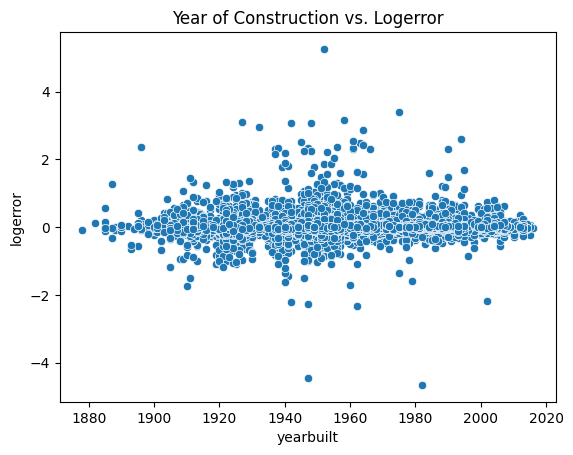

PEARSONR TEST
We reject the null hypothesis with a correlation of 0.022387263513025495 and a p_value of 6.125684022899009e-05


In [9]:
# Analyze the relationship between the year of construction (yearbuilt) and logerror in the provided DataFrame 'df'.
yearbuilt_vs_logerror(df)

 The results of your Pearson correlation test provide evidence that there is a statistically significant, albeit relatively weak, positive correlation between the year of construction (yearbuilt) and the logerror variable. 

In [10]:
analyze_zipcode_logerror(df)

NameError: name 'analyze_zipcode_logerror' is not defined

In [ ]:
df.head()